In [1]:
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sys
sys.path.append("../../utilities/")
import data_utils
import evaluation_utils
import seaborn as sns
import umap
import math
from sklearn import metrics
from matplotlib import pyplot as plt
sys.path.append("../../src")
from dataset_class import dataset
from importlib import reload
evaluation_utils = reload(evaluation_utils)
from hmmlearn import hmm

In [2]:
signals_path = {10000: '../../data/GM12878/hg19/res10000_datasets/signals.txt',
               25000: '../../data/GM12878/hg19/res25000_datasets/signals.txt',
               100000: '../../data/GM12878/hg19/res100000_datasets/signals.txt'}
signals = {}
for res in [10000,25000,100000]:
    signals[res] = np.loadtxt(signals_path[res])

In [3]:
embeddings = {}
for res in [10000,25000,100000]:
    embeddings[res] = umap.UMAP().fit_transform(signals[res])

<AxesSubplot:>

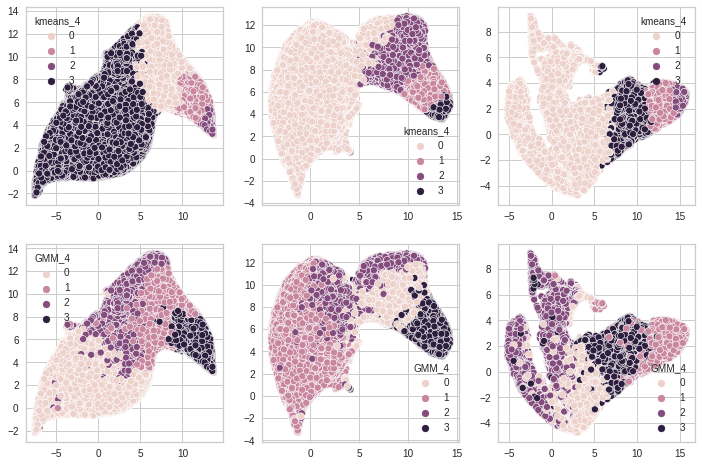

In [9]:
fig, axs = plt.subplots(2,3, figsize = (12,8))

sns.scatterplot(x = embeddings[10000][:,0], y = embeddings[10000][:,1], ax = axs[0,0], 
                hue = kmeans_labels[10000]['kmeans_4'])
sns.scatterplot(x = embeddings[25000][:,0], y = embeddings[25000][:,1], ax = axs[0,1],
               hue = kmeans_labels[25000]['kmeans_4'])
sns.scatterplot(x = embeddings[100000][:,0], y = embeddings[100000][:,1], ax = axs[0,2],
               hue = kmeans_labels[100000]['kmeans_4'])

sns.scatterplot(x = embeddings[10000][:,0], y = embeddings[10000][:,1], ax = axs[1,0], 
                hue = GMM_labels[10000]['GMM_4'])
sns.scatterplot(x = embeddings[25000][:,0], y = embeddings[25000][:,1], ax = axs[1,1],
               hue = GMM_labels[25000]['GMM_4'])
sns.scatterplot(x = embeddings[100000][:,0], y = embeddings[100000][:,1], ax = axs[1,2],
               hue = GMM_labels[100000]['GMM_4'])

In [7]:
kmeans_labels = {}
GMM_labels = {}
for res in [10000, 25000, 100000]:
    kmeans_labels[res] = pd.read_csv('results/kmeans_res{}.txt'.format(res), sep = "\t")
    GMM_labels[res] = pd.read_csv('results/GMM_res{}.txt'.format(res), sep = "\t")

In [10]:
num_domains_df = []
for res in [10000, 25000, 100000]:
    for k in np.arange(2,16):
        num_domain = evaluation_utils.num_domains(GMM_labels[res]['GMM_{}'.format(k)])
        num_domains_df.append({'res': res, 'k': k, 'num_domain': num_domain})
num_domains_df = pd.DataFrame(num_domains_df)

In [11]:
average_length_df = []
for res in [10000, 25000, 100000]:
    for k in np.arange(2,16):
        average_length = evaluation_utils.average_length(GMM_labels[res]['GMM_{}'.format(k)],res)
        average_length_df.append({'res': res, 'k': k, 'average_length': average_length})
average_length_df = pd.DataFrame(average_length_df)

<AxesSubplot:xlabel='k', ylabel='num_domain'>

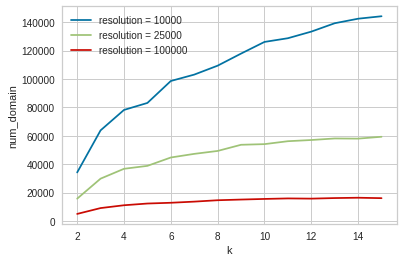

In [14]:
sns.lineplot(data = num_domains_df[num_domains_df['res']==10000],
            x = 'k', y = 'num_domain', label = 'resolution = 10000')
sns.lineplot(data = num_domains_df[num_domains_df['res']==25000],
            x = 'k', y = 'num_domain', label = 'resolution = 25000')
sns.lineplot(data = num_domains_df[num_domains_df['res']==100000],
            x = 'k', y = 'num_domain', label = 'resolution = 100000')

<AxesSubplot:xlabel='k', ylabel='average_length'>

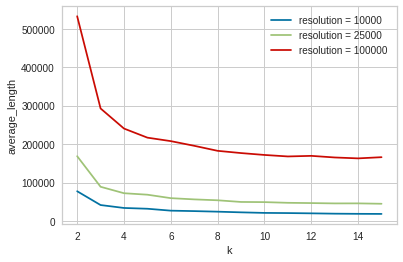

In [15]:
sns.lineplot(data = average_length_df[average_length_df['res']==10000],
            x = 'k', y = 'average_length', label = 'resolution = 10000')
sns.lineplot(data = average_length_df[average_length_df['res']==25000],
            x = 'k', y = 'average_length', label = 'resolution = 25000')
sns.lineplot(data = average_length_df[average_length_df['res']==100000],
            x = 'k', y = 'average_length', label = 'resolution = 100000')